PCA of Pitchfork Reviews with Visualizations

Simran Batra

DS 5559

# Configuration

In [1]:
db_file = 'pitchfork.db'
db_file1 = 'pitchfork_adjectives'


## Libraries

In [5]:
import sqlite3
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import plotly as py
import plotly.graph_objs as go

## Plotly configuration

In [6]:
username = "simranbat"
api_key = "air0e0qwoQBrd6v7aarj"
py.tools.set_credentials_file(username=username, api_key=api_key)

In [7]:
%matplotlib inline

## Loading data

In [8]:
with sqlite3.connect(db_file) as db:
    bags = pd.read_sql("SELECT * FROM bag", db, index_col='bag_id')
    tfidf = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=['bag_id','term_id'])    
    vocab = pd.read_sql("select * from vocab", db, index_col=['term_id'])

## Unpack tf-idf

In [9]:
TFIDF = tfidf.unstack()
TFIDF.columns = TFIDF.columns.droplevel(0)
vocab_idx = TFIDF.columns

# PCA without proper nouns

In [10]:
pca = PCA(n_components=10)
projected = pca.fit_transform(normalize(TFIDF.values, norm='l2'))

## Plot results

In [11]:
def plot_pca(subspace, labels, pc_x = 0, pc_y = 1, figsize=(15, 10), annotate=False):
    plt.figure(figsize=figsize)
    plt.scatter(projected[:, pc_x], 
                projected[:, pc_y],
                c=labels, 
                edgecolor='none', 
                alpha=0.5,
                cmap=plt.cm.get_cmap('terrain', 10))
    plt.xlabel('PC{}'.format(pc_x))
    plt.ylabel('PC{}'.format(pc_y))
    if annotate:
        for i, x in enumerate(subspace):
            plt.annotate(bags.loc[i].Genre, (x[pc_x], x[pc_y]))

In [12]:
genre = bags.Genre
letters = genre.unique().tolist()
genre_ids = genre.apply(lambda x: letters.index(x)).values

## PC0 vs. PC1

### Plot

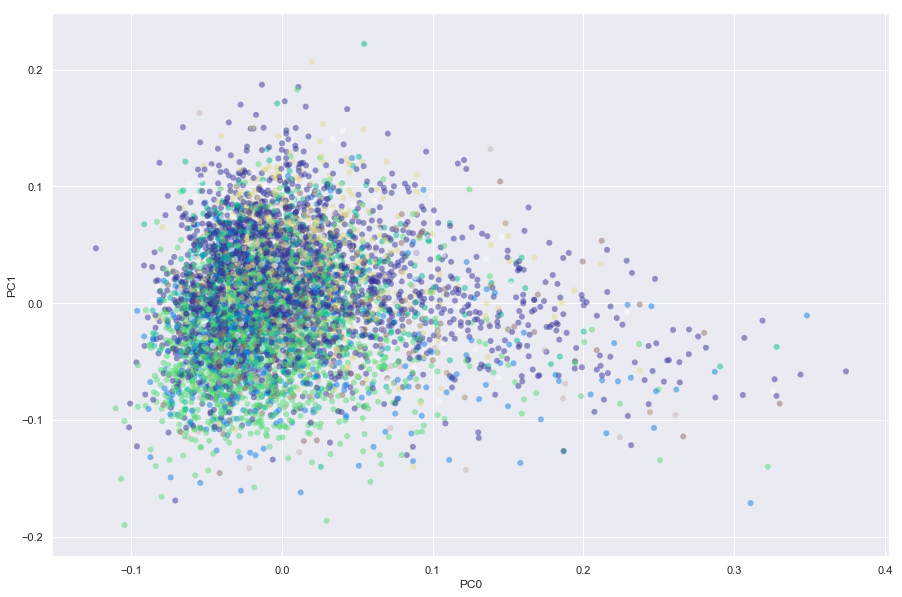

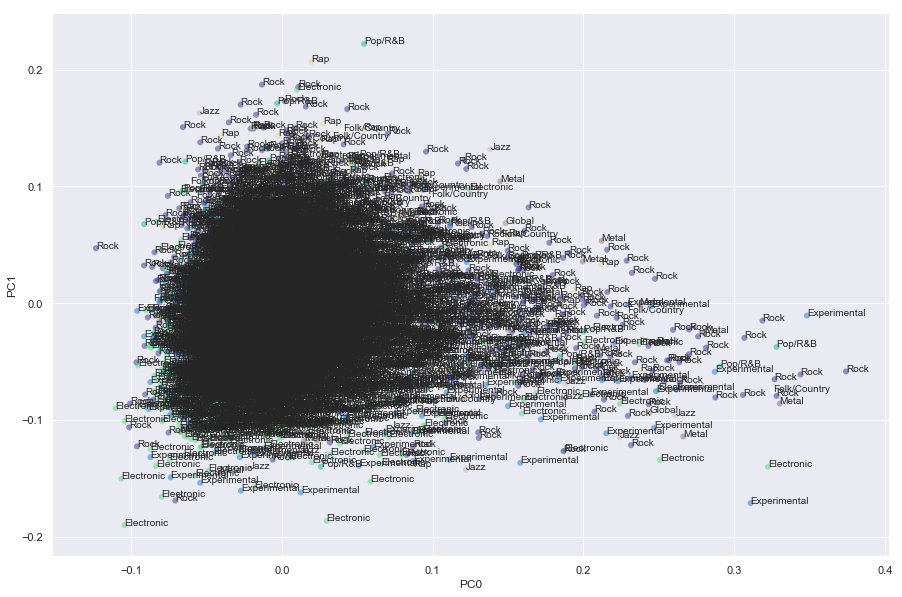

In [13]:
plot_pca(projected, genre_ids, 0, 1)
plot_pca(projected, genre_ids, 0, 1, annotate=True)

## PC1 vs. PC2

### Plot

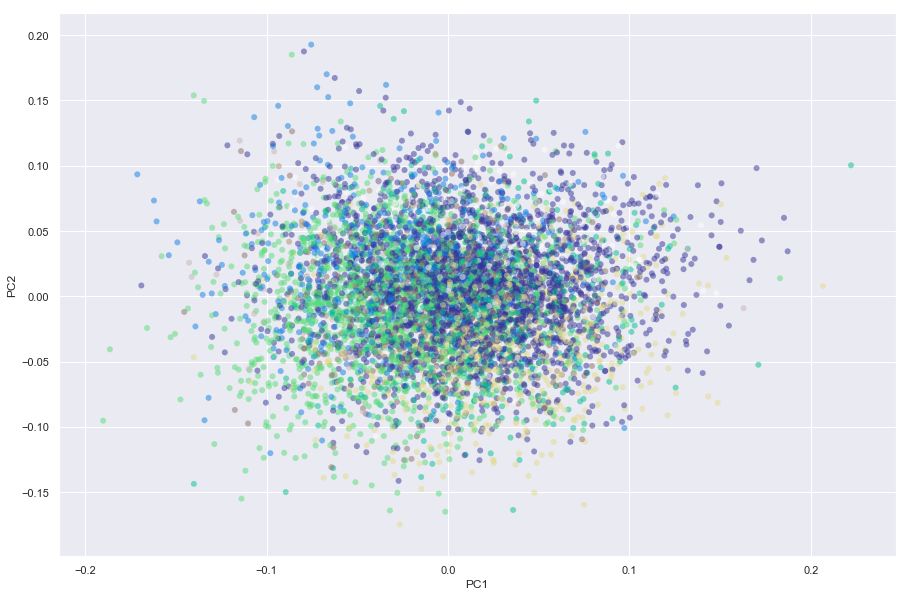

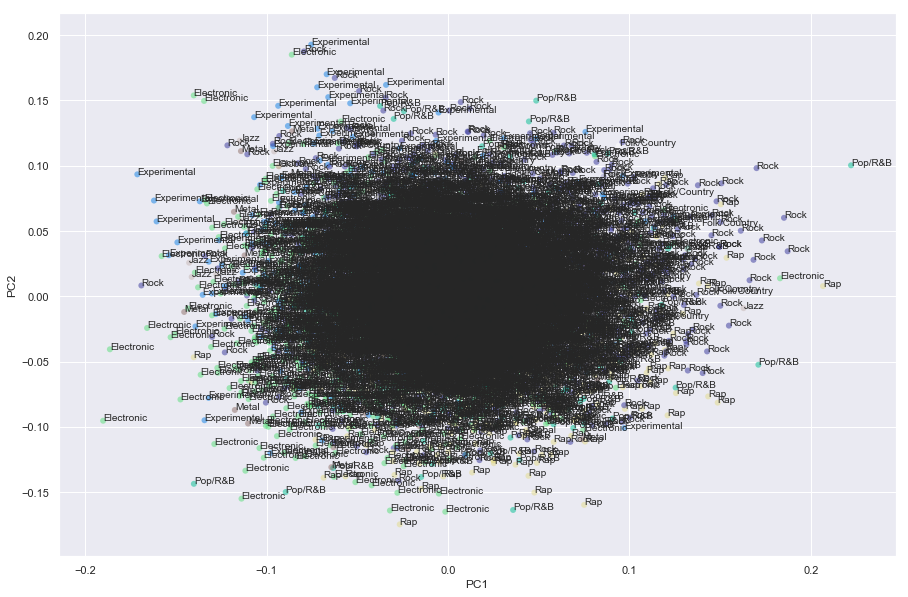

In [14]:
plot_pca(projected, genre_ids, 1, 2)
plot_pca(projected, genre_ids, 1, 2, annotate=True)

## PC2 vs. PC3

### Plot

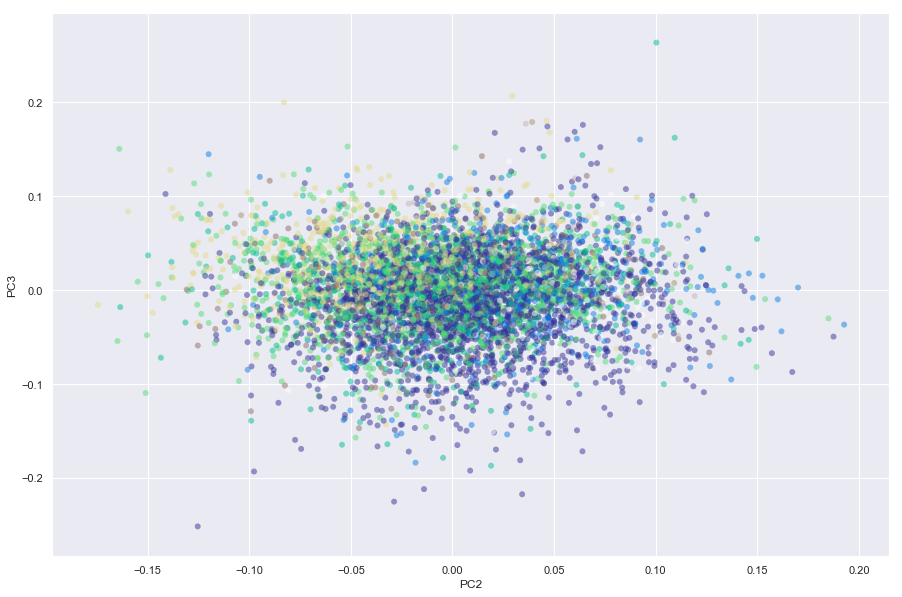

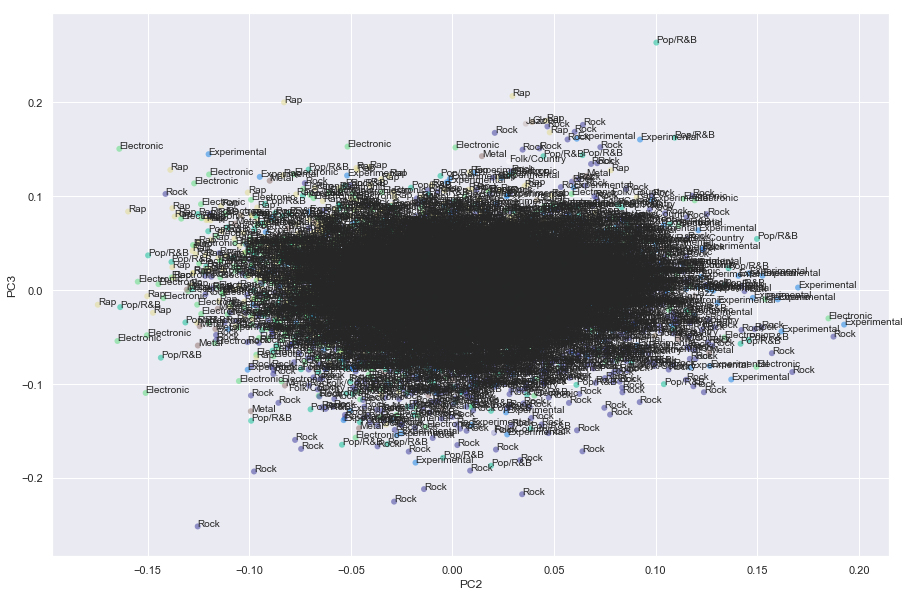

In [19]:
plot_pca(projected, genre_ids, 2, 3)
plot_pca(projected, genre_ids, 2, 3, annotate=True)

## View component loadings

In [16]:
COMPS = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))
COMPS.columns = ["PC{}".format(i) for i in COMPS.columns]
COMPS.index = vocab_idx

In [17]:
vshort = vocab.loc[vocab_idx]
vshort = pd.concat([vshort, COMPS], axis=1)

In [18]:
vshort.head(30)

,term_str,n,p,port_stem,stop,df,idf,tfidf_sum,tfidf_mean,tfidf_max,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
term_id,,,,,,,,,,,,,,,,,,,,
128,abilities,62,0.000013,abil,0,61.0,2.059272,127.674838,0.018260,4.118543,0.000568,0.000245,0.000260,-0.000002,-0.000252,-0.000222,-0.000171,-0.000184,0.000309,-0.000375
129,ability,639,0.000130,abil,0,575.0,1.084934,693.272554,0.099152,3.254801,0.000066,0.001840,-0.005354,0.003434,-0.006499,-0.000049,0.007354,0.006555,0.013380,0.003638
169,abound,67,0.000014,abound,0,67.0,2.018527,135.241283,0.019342,2.018527,0.000256,0.000374,0.000205,-0.000071,0.000767,-0.000082,-0.000256,-0.000004,0.000049,-0.000345
209,abrasive,153,0.000031,abras,0,152.0,1.662758,254.401948,0.036385,3.325516,0.000658,-0.001899,-0.001258,0.000849,0.000604,-0.000918,0.000450,-0.000121,-0.000907,0.001722
222,abruptly,105,0.000021,abruptli,0,103.0,1.831764,192.335240,0.027508,3.663528,-0.000336,0.000013,0.001211,-0.000042,0.000422,0.000290,0.000232,0.000446,0.000366,-0.000322
254,absorbed,95,0.000019,absorb,0,94.0,1.871474,177.789989,0.025428,3.742947,-0.000184,-0.000319,0.001319,-0.000105,-0.000190,-0.000344,0.000341,-0.000218,0.000079,0.000327
258,absorbing,75,0.000015,absorb,0,70.0,1.999503,149.962753,0.021448,3.999007,-0.000298,-0.000785,0.000544,0.000472,-0.000107,0.000028,0.000420,-0.000244,0.000433,0.000702
338,academic,61,0.000012,academ,0,61.0,2.059272,125.615567,0.017966,2.059272,-0.000387,-0.000839,0.000674,0.000262,-0.000303,0.000062,-0.000003,-0.000088,-0.000271,0.000633
364,accented,64,0.000013,accent,0,63.0,2.045261,130.896696,0.018721,4.090522,-0.000649,0.000448,-0.000454,-0.000074,-0.000769,0.000045,-0.000103,-0.000574,-0.000404,-0.000074


### PC0

In [20]:
pc0 = vshort.sort_values('PC0', ascending=False)[['term_str','PC0']]
pc0

,term_str,PC0
term_id,,
73193,reissue,0.025388
73338,released,0.022701
43346,included,0.014163
78502,seemed,0.011310
73203,reissues,0.009797
98362,werent,0.006590
93082,turned,0.006469
84837,started,0.006076
3822,appeared,0.005861


### PC1

In [21]:
pc1 = vshort.sort_values('PC1', ascending=False)[['term_str','PC1']]
pc1

,term_str,PC1
term_id,,
82923,songwriting,0.011278
14210,character,0.010830
67706,political,0.010772
59502,narrative,0.007061
72797,references,0.006735
14954,choruses,0.006433
23372,directly,0.005068
61740,obvious,0.004952
92432,tries,0.004865


### PC2

In [22]:
pc2 = vshort.sort_values('PC2', ascending=False)[['term_str','PC2']]
pc2

,term_str,PC2
term_id,,
73193,reissue,0.012392
95454,uses,0.005782
67706,political,0.005634
19247,creates,0.005366
44420,instrumentation,0.005327
29195,evokes,0.005095
86634,suggests,0.004740
100189,writes,0.004548
14210,character,0.004463


## Plotly 3D Interactive Graph of Components 

In [23]:
df = pd.merge(pc0, pc1).merge(pc2)

In [24]:
df["PC0"].head()

0    0.025388
1    0.022701
2    0.014163
3    0.011310
4    0.009797
Name: PC0, dtype: float64

In [27]:
import plotly.plotly as py
data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']
x = df['PC0']
y = df['PC1']
z = df['PC2']
    
trace = dict(
    x = x, y = y, z = z,
    type = "scatter3d",    
    mode = 'markers',
    text=df["term_str"],
    marker = dict( size=3, color="black", line=dict(width=0) )
)
data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='PCA component loadings',
    scene=dict(
        xaxis=dict(
            title="PC0",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)', 
            titlefont = dict(size=12)
        ),
        yaxis=dict(
            title = "PC1",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)', 
            titlefont = dict(size=12)
        ),
        zaxis=dict(
            title = "PC2",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)', 
            titlefont = dict(size=12)
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)


fig = dict(data=data, layout=layout)

py.iplot(fig, filename="3d_pca")

C:\Users\Simran\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# PCA with adjectives

## load filtered data

In [28]:
with sqlite3.connect(db_file1) as db:
    bags = pd.read_sql("SELECT * FROM bag", db, index_col='bag_id')
    tfidf = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=['bag_id','term_id'])    
    vocab = pd.read_sql("select * from vocab", db, index_col=['term_id'])

### Unpack tf-idf

In [29]:
TFIDF = tfidf.unstack()
TFIDF.columns = TFIDF.columns.droplevel(0)
vocab_idx = TFIDF.columns
pca = PCA(n_components=10)
projected = pca.fit_transform(normalize(TFIDF.values, norm='l2'))
def plot_pca(subspace, labels, pc_x = 0, pc_y = 1, figsize=(15, 10), annotate=False):
    plt.figure(figsize=figsize)
    plt.scatter(projected[:, pc_x], 
                projected[:, pc_y],
                c=labels, 
                edgecolor='none', 
                alpha=0.5,
                cmap=plt.cm.get_cmap('terrain', 10))
    plt.xlabel('PC{}'.format(pc_x))
    plt.ylabel('PC{}'.format(pc_y))
    if annotate:
        for i, x in enumerate(subspace):
            plt.annotate(bags.loc[i].Genre, (x[pc_x], x[pc_y]))
genre = bags.Genre
letters = genre.unique().tolist()
genre_ids = genre.apply(lambda x: letters.index(x)).values

## PC0 vs. PC1

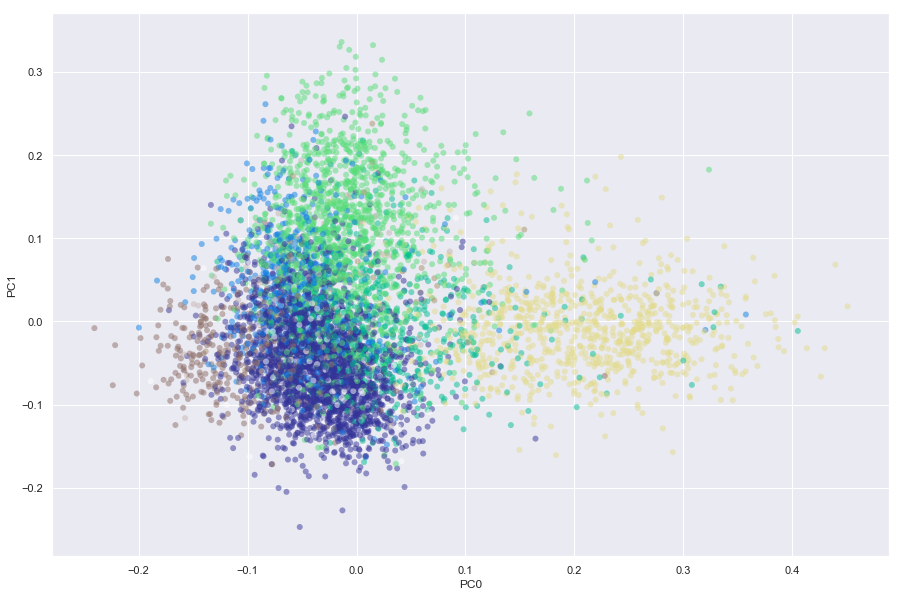

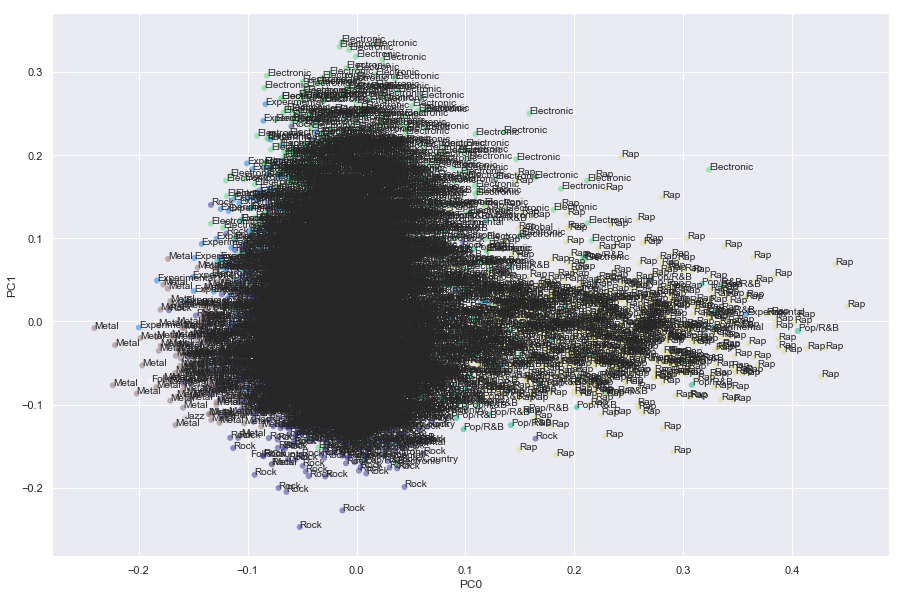

In [30]:
plot_pca(projected, genre_ids, 0, 1)
plot_pca(projected, genre_ids, 0, 1, annotate=True)

## PC1 vs. PC2

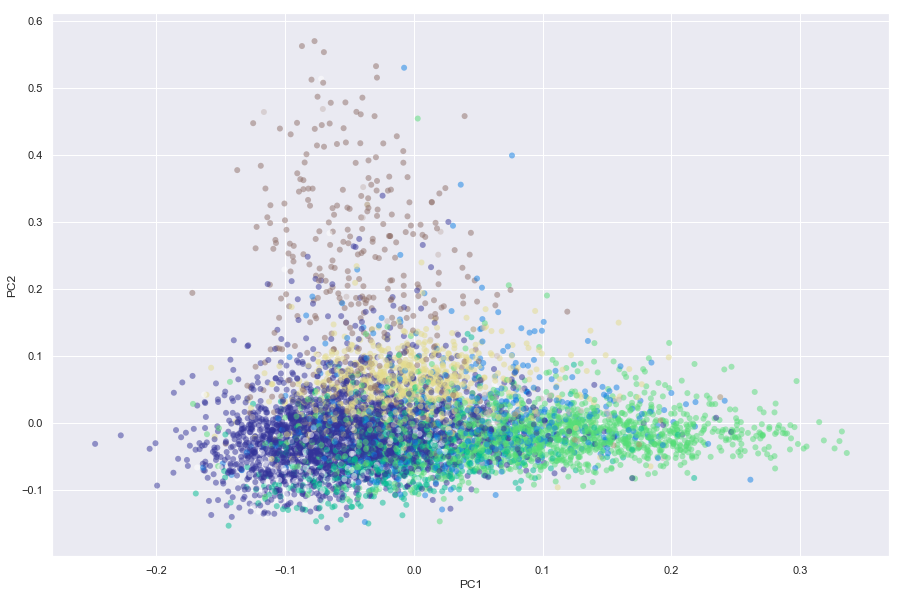

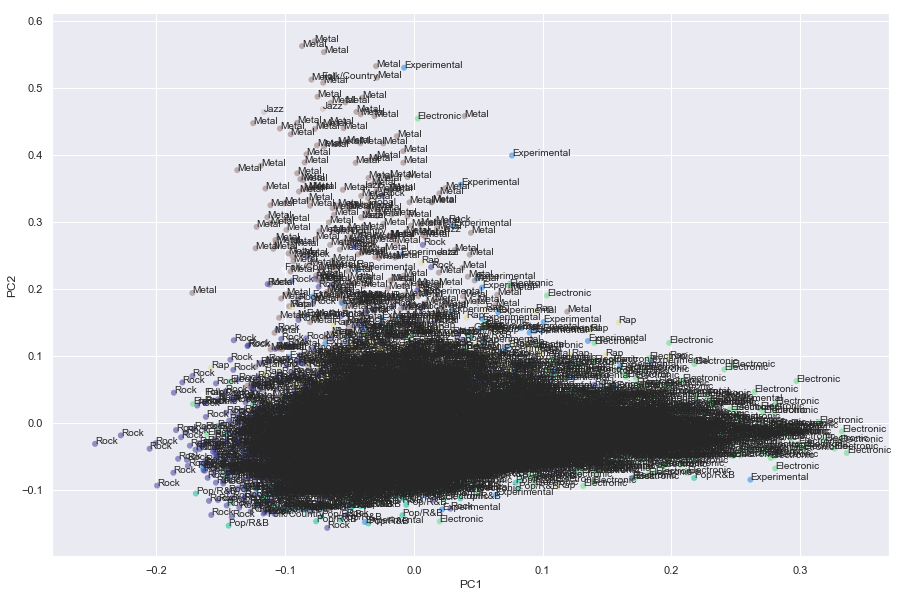

In [31]:
plot_pca(projected, genre_ids, 1, 2)
plot_pca(projected, genre_ids, 1, 2, annotate=True)

## View component loadings

In [33]:
COMPS = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))
COMPS.columns = ["PC{}".format(i) for i in COMPS.columns]
COMPS.index = vocab_idx
vshort = vocab.loc[vocab_idx]
vshort = pd.concat([vshort, COMPS], axis=1)

,term_str,n,p,port_stem,stop,df,idf,tfidf_sum,tfidf_mean,tfidf_max,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
term_id,,,,,,,,,,,,,,,,,,,,
129,ability,639,0.000130,abil,0,575.0,1.084934,693.272554,0.099152,3.254801,0.002416,0.000320,0.000183,-0.000750,-0.000058,-0.000557,0.000013,-0.000246,0.000758,0.000129
142,able,640,0.000130,abl,0,574.0,1.085690,694.841297,0.099377,4.342758,0.000016,-0.000052,0.000556,0.000172,0.000560,-0.000994,-0.001063,-0.001158,0.001387,0.000152
266,abstract,344,0.000070,abstract,0,312.0,1.350447,464.553708,0.066441,6.752234,-0.000732,0.002131,-0.000005,-0.001999,0.000771,-0.000897,-0.000919,0.001169,0.001536,0.001247
395,accessible,309,0.000063,access,0,300.0,1.367480,422.551371,0.060434,2.734960,-0.000787,0.000489,0.000731,0.000185,-0.000033,-0.000224,-0.000449,0.000182,0.001166,-0.000113
568,acid,442,0.000090,acid,0,338.0,1.315685,580.216961,0.082983,14.472532,-0.000225,0.005016,-0.000045,0.003197,-0.000017,0.002489,0.000011,0.001575,-0.002906,0.001023


Top words do not look like adjectives, but as checked in the tf-idf file they were coded as adjectives

### PC0

In [34]:
pc0 = vshort.sort_values('PC0', ascending=False)[['term_str','PC0']]
pc0

,term_str,PC0
term_id,,
71486,rap,0.044220
71533,rapper,0.023751
71581,raps,0.019577
71544,rappers,0.018033
57025,mixtape,0.015055
40571,hip,0.014549
50863,lil,0.013791
71558,rapping,0.013748
41275,hop,0.012806


### PC1

In [35]:
pc1 = vshort.sort_values('PC1', ascending=False)[['term_str','PC1']]
pc1

,term_str,PC1
term_id,,
88818,techno,0.021261
20542,dance,0.015829
41551,house,0.014200
24254,dj,0.013378
27036,electronic,0.013013
2617,ambient,0.010828
87892,synth,0.009709
25749,dubstep,0.009558
7037,bass,0.009308


In [36]:
df = pd.merge(pc0, pc1)
df.head()

,term_str,PC0,PC1
0,rap,0.044220,-0.000374
1,rapper,0.023751,0.000010
2,raps,0.019577,-0.001257
3,rappers,0.018033,-0.000236
4,mixtape,0.015055,0.000259


## Plotly 2D Interactive Graph

In [37]:
data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']
x = df['PC0']
y = df['PC1']
    
trace = dict(
    x = x, y = y,
    type = "scatter",    
    mode = 'markers',
    text=df["term_str"],
    marker = dict( size=3, color="black", line=dict(width=0) )
)
data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='PCA component loadings',
    scene=dict(
        xaxis=dict(
            title="PC0",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)', 
            titlefont = dict(size=12)
        ),
        yaxis=dict(
            title = "PC1",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)', 
            titlefont = dict(size=12)
        ),
        aspectratio = dict( x=1, y=1),
        aspectmode = 'manual'        
    ),
)


fig = dict(data=data, layout=layout)

py.iplot(fig, filename="2d_pca")

C:\Users\Simran\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

